In [2]:
import geopandas
import pandas as pd

xl = pd.ExcelFile('data/table-appartenance-geo-communes-19.xls')

print(xl.sheet_names)  # see all sheet names

df_attributes = xl.parse(xl.sheet_names[0],header=5, dtype=str)

df_attributes

['COM', 'ARM', 'Zones_supra_communales', 'Variables', 'Documentation']


,CODGEO,LIBGEO,DEP,REG,EPCI,NATURE_EPCI,ARR,CV,ZE2010,UU2010,TUU2016,TDUU2016,AU2010,TAU2016,CATAEU2010,BV2012
0,01001,L'Abergement-Clémenciat,01,84,200069193,CC,012,0108,8213,01000,0,05,997,00,120,01093
1,01002,L'Abergement-de-Varey,01,84,240100883,CC,011,0101,8201,01000,0,04,002,09,112,01004
2,01004,Ambérieu-en-Bugey,01,84,240100883,CC,011,0101,8201,01302,3,32,002,09,112,01004
3,01005,Ambérieux-en-Dombes,01,84,200042497,CC,012,0122,8213,01000,0,06,002,09,112,69123
4,01006,Ambléon,01,84,200040350,CC,011,0104,8216,01000,0,03,998,00,300,01034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34965,97613,M'Tsangamouji,976,06,200059871,CC,ZZZZ,97613,0601,9F201,2,21,9F1,08,112,ZZZZZ
34966,97614,Ouangani,976,06,200059871,CC,ZZZZ,97610,0601,9F204,3,31,9F1,08,112,ZZZZZ
34967,97615,Pamandzi,976,06,200050532,CC,ZZZZ,97611,0601,9F401,4,42,000,00,400,ZZZZZ
34968,97616,Sada,976,06,200059871,CC,ZZZZ,97612,0601,9F207,3,31,9F1,08,112,ZZZZZ


In [3]:
df_towns_france = geopandas.read_file("data/COMMUNE_FIXED.shp")
df_towns_france = df_towns_france[df_towns_france["TYPE"] == 'COM']

In [4]:
df_supra_communal = xl.parse(xl.sheet_names[2],header=5, dtype=str)
df_supra_communal

,NIVGEO,CODGEO,LIBGEO,NB_COM
0,ARR,011,Belley,105
1,ARR,012,Bourg-en-Bresse,199
2,ARR,013,Gex,27
3,ARR,014,Nantua,62
4,ARR,021,Château-Thierry,108
...,...,...,...,...
8977,ZE2010,9403,Sartène - Propriano,19
8978,ZE2010,9404,Bastia,152
8979,ZE2010,9405,Calvi - L'Île-Rousse,32
8980,ZE2010,9406,Corte,32


In [5]:
# Left join

df_towns_france = df_towns_france.merge(df_attributes, how='left', left_on='INSEE_COM', right_on='CODGEO', suffixes=('', ''))
df_towns_france

,ID,STATUT,INSEE_COM,INSEE_ARR,INSEE_DEP,INSEE_REG,CODE_EPCI,NOM_COM_M,POPULATION,TYPE,...,ARR,CV,ZE2010,UU2010,TUU2016,TDUU2016,AU2010,TAU2016,CATAEU2010,BV2012
0,COMMUNE_0000000009728958,Commune simple,02451,3,02,32,240200493,MAGNY LA FOSSE,125,COM,...,023,0201,2205,02000,0,03,074,07,112,02691
1,COMMUNE_0000002200276464,Commune simple,01227,1,01,84,200040350,MAGNIEU,640,COM,...,011,0104,8216,01000,0,05,294,02,212,01034
2,COMMUNE_0000000009728784,Commune simple,02061,3,02,32,240200493,BECQUIGNY,260,COM,...,023,0201,2205,02000,0,04,998,00,300,02095
3,COMMUNE_0000002200276482,Commune simple,14514,3,14,28,241400878,PONT L EVEQUE,4740,COM,...,143,1421,2503,14120,2,21,997,00,120,14514
4,COMMUNE_0000000009729157,Commune simple,02374,3,02,32,240200493,LEHAUCOURT,886,COM,...,023,0201,2205,02000,0,05,074,07,112,02691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34965,COMMUNE_0000001369858499,Commune simple,97312,1,973,03,200027548,SINNAMARY,2943,COM,...,9731,973ZZ,0302,9C101,1,12,000,00,400,97304
34966,COMMUNE_0000001369858514,Commune simple,97353,2,973,03,249730037,MARIPASOULA,12798,COM,...,9732,973ZZ,0303,9C201,3,31,9C4,01,221,97302
34967,COMMUNE_0000001369858496,Commune simple,97313,1,973,03,249730045,MONTSINERY TONNEGRANDE,2530,COM,...,9731,973ZZ,0301,9C000,0,07,9C1,07,112,97302
34968,COMMUNE_0000001369858500,Préfecture de région,97302,1,973,03,249730045,CAYENNE,60580,COM,...,9731,973ZZ,0301,9C601,6,61,9C1,07,111,97302


In [6]:
df_towns_france_metro = df_towns_france[df_towns_france["INSEE_DEP"].str.len() == 2]
#print(df_towns_france_metro.crs)
df_towns_france_metro.plot(edgecolor='#070707', linewidth=0.05)

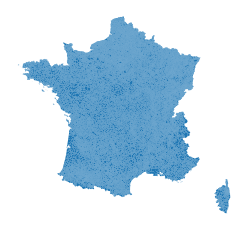

In [7]:
df_towns_france_metro_2154 = df_towns_france_metro.to_crs(epsg=2154)
subplot = df_towns_france_metro_2154.plot()
subplot.set_axis_off()

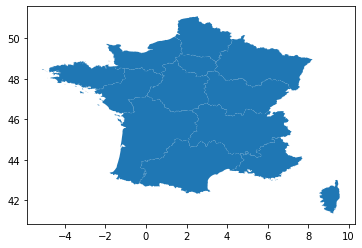

In [8]:
regions = df_towns_france_metro.dissolve(by='REG')
regions.plot()

In [9]:
cols_regions = ['REG', 'geometry']
regions.reset_index(inplace=True)
regions_cols = regions[cols_regions]
df_supra_communal_regions = df_supra_communal[df_supra_communal["NIVGEO"] == 'REG']
regions_cols = regions_cols.merge(df_supra_communal_regions, how='left', left_on='REG', right_on='CODGEO', suffixes=('', ''))
regions_cols.to_file("data/output/regions.shp", encoding='utf-8')

In [10]:
# To check issue on join
# filtered_df = df[df['var2'].isnull()]

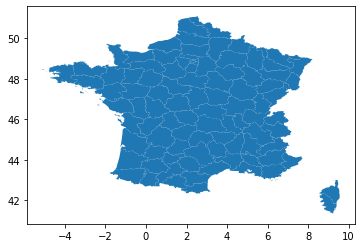

In [11]:
departements = df_towns_france_metro.dissolve(by='DEP')
departements.plot()

In [12]:
cols_departements = ['DEP', 'geometry']
departements.reset_index(inplace=True)
departements_cols = departements[cols_departements]
df_supra_communal_departements = df_supra_communal[df_supra_communal["NIVGEO"] == 'DEP']
departements_cols = departements_cols.merge(df_supra_communal_departements, how='left', left_on='DEP', right_on='CODGEO', suffixes=('', ''))
departements_cols.to_file("data/output/departements.shp", encoding='utf-8')

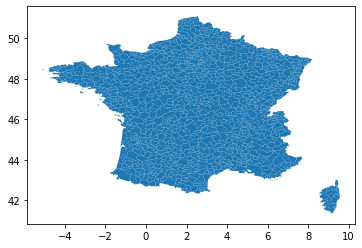

In [13]:
epcis = df_towns_france_metro.dissolve(by='EPCI')
epcis.plot()

In [14]:
cols_epcis = ['EPCI', 'geometry']
epcis.reset_index(inplace=True)
epcis_cols = epcis[cols_epcis]
df_supra_communal_epcis = df_supra_communal[df_supra_communal["NIVGEO"] == 'EPCI']
epcis_cols = epcis_cols.merge(df_supra_communal_epcis, how='left', left_on='EPCI', right_on='CODGEO', suffixes=('', ''))
epcis_cols.to_file("data/output/epcis.shp", encoding='utf-8')

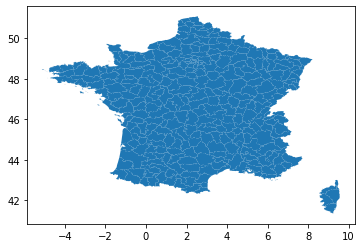

In [15]:
arrondissements = df_towns_france_metro.dissolve(by='ARR')
arrondissements.plot()

In [16]:
cols_arrondissements = ['ARR', 'geometry']
arrondissements.reset_index(inplace=True)
arrondissements_cols = arrondissements[cols_arrondissements]
df_supra_communal_arrondissements = df_supra_communal[df_supra_communal["NIVGEO"] == 'ARR']
arrondissements_cols = arrondissements_cols.merge(df_supra_communal_arrondissements, how='left', left_on='ARR', right_on='CODGEO', suffixes=('', ''))
arrondissements_cols.to_file("data/output/arrondissements.shp", encoding='utf-8')

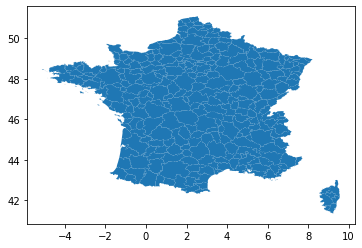

In [17]:
zones_emplois = df_towns_france_metro.dissolve(by='ZE2010')
zones_emplois.plot()

In [18]:
cols_zones_emplois = ['ZE2010', 'geometry']
zones_emplois.reset_index(inplace=True)
zones_emplois_cols = zones_emplois[cols_zones_emplois]
df_supra_communal_zones_emplois = df_supra_communal[df_supra_communal["NIVGEO"] == 'ZE2010']
zones_emplois_cols = zones_emplois_cols.merge(df_supra_communal_zones_emplois, how='left', left_on='ZE2010', right_on='CODGEO', suffixes=('', ''))
zones_emplois_cols.to_file("data/output/zones_emplois.shp", encoding='utf-8')

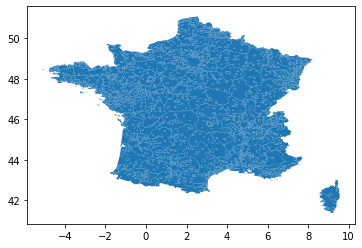

In [19]:
unites_urbaines = df_towns_france_metro.dissolve(by='UU2010')
unites_urbaines.plot()

In [20]:
cols_unites_urbaines = ['UU2010', 'TUU2016', 'TDUU2016', 'geometry']
unites_urbaines.reset_index(inplace=True)
unites_urbaines_cols = unites_urbaines[cols_unites_urbaines]
df_supra_communal_unites_urbaines = df_supra_communal[df_supra_communal["NIVGEO"] == 'UU2010']
unites_urbaines_cols = unites_urbaines_cols.merge(df_supra_communal_unites_urbaines, how='left', left_on='UU2010', right_on='CODGEO', suffixes=('', ''))
unites_urbaines_cols.to_file("data/output/unites_urbaines.shp", encoding='utf-8')
unites_urbaines_cols

,UU2010,TUU2016,TDUU2016,geometry,NIVGEO,CODGEO,LIBGEO,NB_COM
0,00151,1,11,"POLYGON ((5.92710 47.31075, 5.92691 47.31191, ...",UU2010,00151,Cussey-sur-l'Ognon,3
1,00152,1,11,"POLYGON ((3.01801 50.26471, 3.01743 50.26518, ...",UU2010,00152,Lécluse,2
2,00153,1,11,"POLYGON ((3.05476 50.28996, 3.05385 50.29072, ...",UU2010,00153,Gouy-sous-Bellonne,2
3,00154,1,11,"POLYGON ((2.74097 43.26469, 2.74019 43.26459, ...",UU2010,00154,Olonzac,2
4,00155,1,11,"POLYGON ((1.77460 44.92356, 1.77403 44.92452, ...",UU2010,00155,Vayrac,3
...,...,...,...,...,...,...,...,...
2316,95202,2,21,"POLYGON ((1.78403 49.14498, 1.78371 49.14474, ...",UU2010,95202,Magny-en-Vexin,3
2317,95203,2,22,"POLYGON ((2.28482 49.04901, 2.28381 49.04968, ...",UU2010,95203,Montsoult,3
2318,95301,3,31,"POLYGON ((2.52606 49.03012, 2.52533 49.02691, ...",UU2010,95301,Louvres,2
2319,95302,3,32,"POLYGON ((2.39356 49.09809, 2.39137 49.10070, ...",UU2010,95302,Viarmes,5


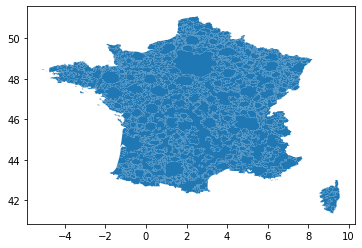

In [21]:
aires_urbaines = df_towns_france_metro.dissolve(by='AU2010')
aires_urbaines.plot()

In [22]:
cols_aires_urbaines = ['AU2010', 'TAU2016', 'CATAEU2010', 'geometry']
aires_urbaines.reset_index(inplace=True)
aires_urbaines_cols = aires_urbaines[cols_aires_urbaines]
df_supra_communal_aires_urbaines = df_supra_communal[df_supra_communal["NIVGEO"] == 'AU2010']
aires_urbaines_cols = aires_urbaines_cols.merge(df_supra_communal_aires_urbaines, how='left', left_on='AU2010', right_on='CODGEO', suffixes=('', ''))
aires_urbaines_cols.to_file("data/output/aires_urbaines.shp", encoding='utf-8')
aires_urbaines_cols

,AU2010,TAU2016,CATAEU2010,geometry,NIVGEO,CODGEO,LIBGEO,NB_COM
0,000,00,400,"MULTIPOLYGON (((2.56192 42.35723, 2.56151 42.3...",AU2010,000,Communes isolées hors influence des pôles,7006
1,001,10,112,"POLYGON ((3.50298 48.60464, 3.50434 48.60303, ...",AU2010,001,Paris,1751
2,002,09,111,"POLYGON ((4.72197 45.49431, 4.72263 45.49409, ...",AU2010,002,Lyon,498
3,003,09,111,"MULTIPOLYGON (((5.39454 43.16993, 5.39456 43.1...",AU2010,003,Marseille - Aix-en-Provence,90
4,004,09,112,"POLYGON ((1.90678 43.47171, 1.90352 43.47232, ...",AU2010,004,Toulouse,452
...,...,...,...,...,...,...,...,...
766,769,01,221,"POLYGON ((-1.24341 47.59665, -1.24117 47.59659...",AU2010,769,Saint-Mars-la-Jaille,1
767,770,01,221,"POLYGON ((7.50337 48.06839, 7.51114 48.06921, ...",AU2010,770,Biesheim,1
768,771,01,221,"POLYGON ((-1.00189 48.59012, -1.00168 48.59038...",AU2010,771,Mortain,2
769,997,00,120,"MULTIPOLYGON (((2.66813 49.23234, 2.66809 49.2...",AU2010,997,Multipolarisé des grands pôles,3771


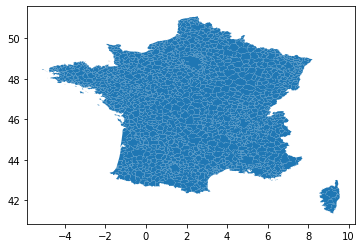

In [23]:
bassins_vie = df_towns_france_metro.dissolve(by='BV2012')
bassins_vie.plot()

In [24]:
cols_bassins_vie = ['BV2012', 'geometry']
bassins_vie.reset_index(inplace=True)
bassins_vie_cols = bassins_vie[cols_bassins_vie]
df_supra_communal_bassins_vie = df_supra_communal[df_supra_communal["NIVGEO"] == 'BV2012']
bassins_vie_cols = bassins_vie_cols.merge(df_supra_communal_bassins_vie, how='left', left_on='BV2012', right_on='CODGEO', suffixes=('', ''))
bassins_vie_cols
bassins_vie_cols.to_file("data/output/bassins_vie.shp", encoding='utf-8')

In [25]:
# Plaything (incomplete)
df_towns_france_metro_add = df_towns_france_metro.merge(df_supra_communal_bassins_vie, how='left', left_on='BV2012', right_on='CODGEO', suffixes=('', '_r'))
df_towns_france_metro_add
df_towns_france_metro_add = df_towns_france_metro_add.drop(columns=['NIVGEO', 'CODGEO_r', 'NB_COM'])
df_towns_france_metro_add = df_towns_france_metro_add.rename(columns={'LIBGEO_r':'L_BV2012'})

m_tau2016 = pd.read_csv("data/m_tau2016.txt", delimiter=';', dtype=str)
m_cataeu2010 = pd.read_csv("data/m_cataeu2010.txt", delimiter=';', dtype=str)
df_towns_france_metro_add = df_towns_france_metro_add.merge(m_tau2016, how='left', left_on='TAU2016', right_on='identifier', suffixes=('', ''))
df_towns_france_metro_add = df_towns_france_metro_add.drop(columns=['identifier'])
df_towns_france_metro_add = df_towns_france_metro_add.rename(columns={'libelle':'L_TAU2016'})
df_towns_france_metro_add = df_towns_france_metro_add.merge(m_cataeu2010, how='left', left_on='CATAEU2010', right_on='identifier', suffixes=('', ''))
df_towns_france_metro_add = df_towns_france_metro_add.drop(columns=['identifier'])
df_towns_france_metro_add = df_towns_france_metro_add.rename(columns={'libelle':'L_CAU2010'})

m_tuu2016 = pd.read_csv("data/m_tuu2016.txt", delimiter=';', dtype=str)
m_tduu2016 = pd.read_csv("data/m_tduu2016.txt", delimiter=';', dtype=str)
df_towns_france_metro_add = df_towns_france_metro_add.merge(m_tuu2016, how='left', left_on='TUU2016', right_on='identifier', suffixes=('', ''))
df_towns_france_metro_add = df_towns_france_metro_add.drop(columns=['identifier'])
df_towns_france_metro_add = df_towns_france_metro_add.rename(columns={'libelle':'L_TUU2016'})
df_towns_france_metro_add = df_towns_france_metro_add.merge(m_tduu2016, how='left', left_on='TDUU2016', right_on='identifier', suffixes=('', ''))
df_towns_france_metro_add = df_towns_france_metro_add.drop(columns=['identifier'])
df_towns_france_metro_add = df_towns_france_metro_add.rename(columns={'libelle':'L_TDUU2016'})

df_towns_france_metro_add.to_file("data/output/communes_additional.shp", encoding='utf-8')